# 3-1 Vertiport

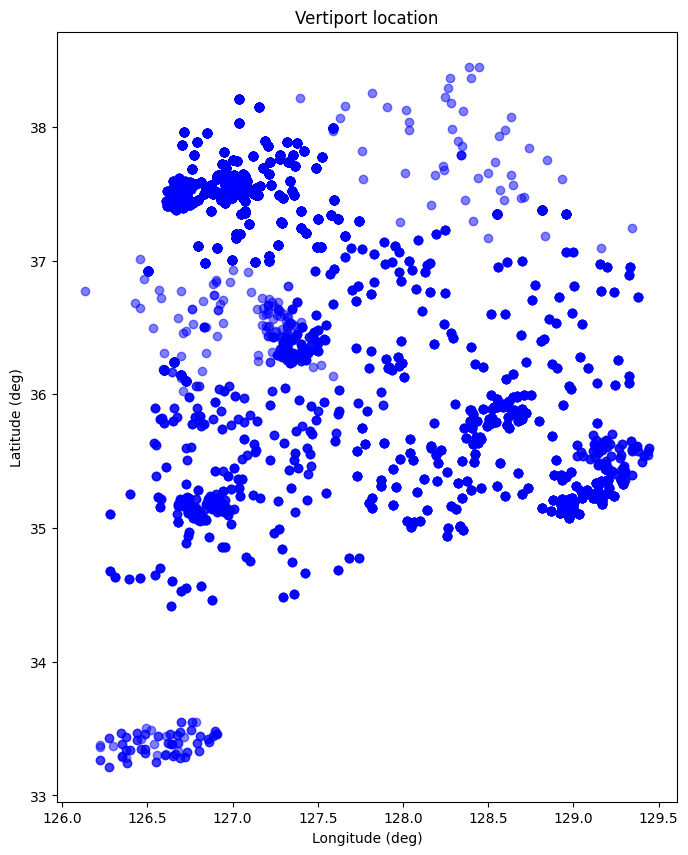

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# read data
data = pd.read_csv('/content/Vertiport_candidates (1).csv')

# Extract latitude and longitude
latitude = data['Latitude (deg)']
longitude = data['Longitude (deg)']

# Visualize locations
plt.figure(figsize=(8, 10))
plt.scatter(longitude, latitude, c='b', alpha=0.5)
plt.title('Vertiport location')
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.show()


# 3-1 Vertiport on map
### use folium
### save html file

In [ ]:
import folium

# South Korea map center coordinates
center_lat, center_lon = latitude.mean(), longitude.mean()

# Create a Folium map object
m = folium.Map(location=[center_lat, center_lon], zoom_start=7)

# Adding data points to a map
for i, row in data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude (deg)'], row['Longitude (deg)']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.3
    ).add_to(m)

# Save a map of South Korea as an HTML file
m.save('korea_map.html')


# 3-2 Vertiport k=17

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


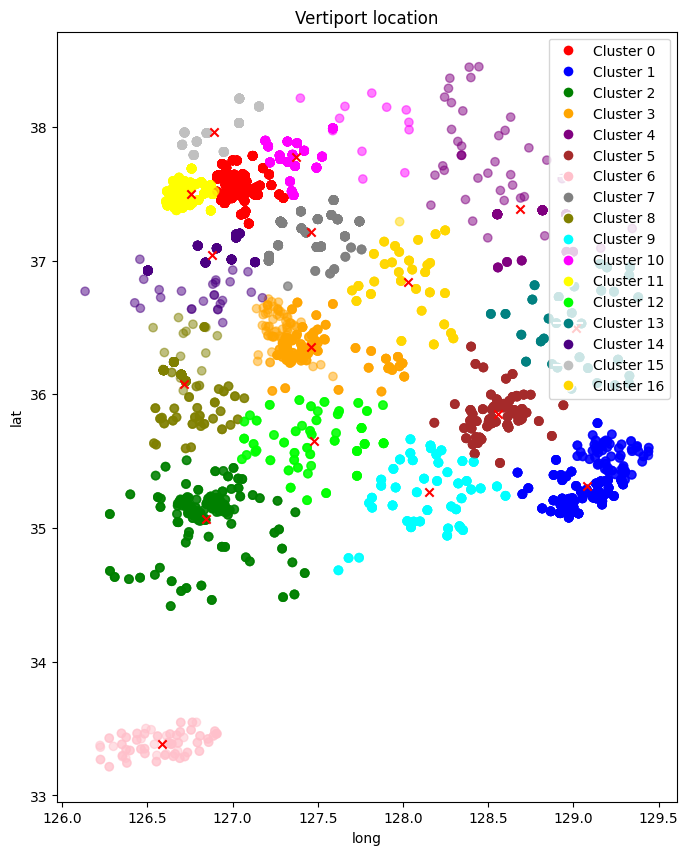

0     1695
1      772
11     746
10     544
7      512
2      475
5      467
3      401
9      361
8      341
14     318
15     270
13     203
12     195
4      191
16     182
6      101
dtype: int64
Points closest to the initial centroid:
      Longitude (deg)  Latitude (deg)
41         127.056758       37.557166
1457       129.077694       35.287533
6545       126.841976       35.060852
2969       127.460331       36.370820
5490       128.689629       37.468425
1974       128.520971       35.826762
7722       126.621901       33.396161
3465       127.431361       37.210443
5912       126.725099       36.098771
7173       128.080643       35.267943
3460       127.351542       37.792031
2337       126.736485       37.519229
6238       127.463813       35.700017
6794       129.046941       36.529973
3434       126.907116       37.092563
3414       126.847895       37.953911
5683       127.987621       36.848668


In [ ]:
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# extract latitude and longitude
latitude = data['Latitude (deg)']
longitude = data['Longitude (deg)']

# prepare data (make latitude, longitude into one array)
coordinates = pd.concat([latitude, longitude], axis=1)

# Set 20 initial center points and group them using the K-means algorithm
kmeans = KMeans(n_clusters=17, random_state=2).fit(coordinates)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# visualize locations
# setting color
cluster_color_map = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'orange',
    4: 'purple',
    5: 'brown',
    6: 'pink',
    7: 'gray',
    8: 'olive',
    9: 'cyan',
    10: 'magenta',
    11: 'yellow',
    12: 'lime',
    13: 'teal',
    14: 'indigo',
    15: 'silver',
    16: 'gold',
}


color_map = [cluster_color_map[label] for label in labels]

plt.figure(figsize=(8, 10))
scatter = plt.scatter(longitude, latitude, c=color_map, alpha=0.5)
plt.scatter(centroids[:, 1], centroids[:, 0], marker='x', color='red')
plt.title('Vertiport location')
plt.xlabel('long')
plt.ylabel('lat')

# Add a legend by specifying the color and cluster number based on the clustering results
legend_elements = []
for cluster_num, color in cluster_color_map.items():
    legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(cluster_num), markerfacecolor=color, markersize=8))

# Add a legend to the graph
plt.legend(handles=legend_elements, loc='upper right')

# show the graph
plt.show()


# show the graph
distances = cdist(centroids, coordinates, metric='euclidean')
closest_points_indices = distances.argmin(axis=1)
closest_points = data.iloc[closest_points_indices]

# Count of objects in a cluster
cluster_counts = pd.Series(labels).value_counts()
print(cluster_counts)



# print the result
print("Points closest to the initial centroid:")
print(closest_points)


# Apply to the graph map above
### use folium
### save html file

In [ ]:
# python map library
import folium

# map center coordinates for South Korea
center_lat, center_lon = 36.5, 127.5

# Create a folium map object
m = folium.Map(location=[center_lat, center_lon], zoom_start=7)

# Add data points to the map
for i, row in data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude (deg)'], row['Longitude (deg)']],
        radius=3,
        color='blue',
        fill=True,
        fill_color='blue',
        f sill_opacity=0.15
    ).add_to(m)


# add the closest points to the map
for i, row in closest_points.iterrows():
    folium.Marker(
        location=[row['Latitude (deg)'], row['Longitude (deg)']],
        icon=folium.Icon(color='pink', icon='cloud')
    ).add_to(m)

# Save the map of South Korea as an HTML file
m.save('korea_map1.html')
